<a href="https://colab.research.google.com/github/Bernardo-Senna/DataScience_Cryptocurrency_Project/blob/main/notebooks/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Projeto Final: Cryptocurrency
## Introdução
Neste trabalho vamos analisar informações históricas de preços de algumas das principais criptomoedas do mercado, por capitalização.

### Motivação
A motivação pelo trabalho veio de um interesse em comum entre os membros do grupo, à respeito da ascenção apresentada pelas Cripto Moedas. 
Para entender melhor as influências criadas por elas no mercado financeiro, e também os diversos impactos causados por elas, escolhemos uma base de dados que apresenta os dados históricos de 23 das principais cripto moedas existentes.

### Dados Utilizados
Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público (Kaggle). Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
import scipy as sci
import scipy.stats as st
import seaborn as sb
import statsmodels.api as sm
import os
import pandas
import sklearn
from statsmodels import tsa
import scipy.stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
notebooks_dir = os.getcwd()

### Tratamento dos dados

Nesta seção nós faremos o parse dos dados do banco para um conjunto de dataframes Pandas.

In [3]:
#o comando abaixo faz com que o Pandas identifique dados que tendem ao infinito (inf ou -inf), tratando-os como NaN
pandas.options.mode.use_inf_as_na = True

In [4]:
coinsDict = {
    'aave':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Aave.csv"),
    'binanceCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_BinanceCoin.csv"),
    'bitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Bitcoin.csv"),
    'cardano':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cardano.csv"),
    'chainLink':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_ChainLink.csv"),
    'cosmos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cosmos.csv"),
    'cryptocomCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_CryptocomCoin.csv"),
    'dogecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Dogecoin.csv"),
    'eos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_EOS.csv"),
    'ethereum':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Ethereum.csv"),
    'lota':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Iota.csv"),
    'litecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Litecoin.csv"),
    'monero':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Monero.csv"),
    'nem':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_NEM.csv"),
    'polkadot':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Polkadot.csv"),
    'solana':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Solana.csv"),
    'stellar':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Stellar.csv"),
    'tether':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tether.csv"),
    'tron':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tron.csv"),
    'usdCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_USDCoin.csv"),
    'uniswap':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Uniswap.csv"),
    'wrappedBitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_WrappedBitcoin.csv"),
    'xrp':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_XRP.csv"),
}

In [5]:
#parse da forma como vem dos datasets
coinsDict['aave']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
141,142,Aave,AAVE,2021-02-23 23:59:59,401.648853,288.714523,400.784976,359.497520,1.179704e+09,4.461395e+09
142,143,Aave,AAVE,2021-02-24 23:59:59,402.910314,344.938860,360.210985,367.230900,7.635339e+08,4.557747e+09
143,144,Aave,AAVE,2021-02-25 23:59:59,384.707877,337.501464,367.219217,337.501464,4.506436e+08,4.189245e+09
144,145,Aave,AAVE,2021-02-26 23:59:59,350.865442,305.153562,338.277176,323.108175,5.491783e+08,4.011296e+09


In [6]:
for coin in coinsDict:
    #separação das datas em dia, mês e ano
    coinsDict[coin]['Year'] = coinsDict[coin]['Date'].map(lambda x: x[0:4])
    coinsDict[coin]['Month'] = coinsDict[coin]['Date'].map(lambda x: x[5:7])
    coinsDict[coin]['Day'] = coinsDict[coin]['Date'].map(lambda x: x[8:10])
    # inclusão da variável difference, que significa a diferença entre o valor de abertura e fechamento da moeda no dia
    coinsDict[coin]['Difference'] = coinsDict[coin]['Close'] - coinsDict[coin]['Open']
    # inclusão de difference percentage, que demonstra os valores de difference, mas percentualmente, para melhor análise
    coinsDict[coin]['DifferencePerc'] = coinsDict[coin]['Difference'] / coinsDict[coin]['Open']
    # limpeza de Date, excluíndo o horário, porque todos são 23:59, ou seja, irrelevante
    coinsDict[coin]['Date'] = coinsDict[coin]['Date'].map(lambda x: x[0:10])

In [7]:
coinsDict['aave']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DifferencePerc
0,1,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,2020,10,05,0.544208,0.010331
1,2,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,2020,10,06,-10.890371,-0.204353
2,3,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,2020,10,07,-2.315971,-0.054622
3,4,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,2020,10,08,3.879201,0.097259
4,5,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,2020,10,09,3.053281,0.069766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Aave,AAVE,2021-02-23,401.648853,288.714523,400.784976,359.497520,1.179704e+09,4.461395e+09,2021,02,23,-41.287456,-0.103016
142,143,Aave,AAVE,2021-02-24,402.910314,344.938860,360.210985,367.230900,7.635339e+08,4.557747e+09,2021,02,24,7.019914,0.019488
143,144,Aave,AAVE,2021-02-25,384.707877,337.501464,367.219217,337.501464,4.506436e+08,4.189245e+09,2021,02,25,-29.717754,-0.080926
144,145,Aave,AAVE,2021-02-26,350.865442,305.153562,338.277176,323.108175,5.491783e+08,4.011296e+09,2021,02,26,-15.169000,-0.044842


### Análise preliminar: comportamento individual das moedas no tempo

Nestes plots evidenciamos o comportamento de cada moeda ao longo do tempo, individualmente.

#### Disclaimer!
Os plots foram transferidos para pastas externas para:
1. Possibilitar salvá-los e utilizá-los posteriormente
2. Facilitar a visualização, visto que são muitos plots, que poluem o notebook quando colocados todos juntos em sequência

In [8]:
#Cada ítem desta lista significa: (nome da pasta onde os gráficos estão plotados, nome da variável no DataFrame)
plotting_pairs = [("CloseValue", "Close"), ("OpenCloseDiff", "Difference"), ("OpenCloseDiffPerc", "DifferencePerc"),
                  ("HighestValue", "High"), ("LowestValue", "Low"), ("MarketCap", "Marketcap"), 
                  ("TransactionsVolume", "Volume")]

##### Plots das progressões no tempo

In [9]:
os.chdir(notebooks_dir)
os.chdir("../plots/IndividualValueProgressionOverTime/")

In [10]:
def plot_progression(coinsDict, param):
    for name, coin in coinsDict.items():
      fig = plt.figure()
      coin.plot("Date",param, ax=fig.add_subplot())
      plt.title(name)
      plt.xticks(rotation=90)
      plt.ylabel("value in USD")
      plt.savefig("{}.png".format(name), transparent=True, bbox_inches='tight')
      plt.close()
      #plt.show()

In [11]:
for pair in plotting_pairs:
    if pair[0] == "CloseValue": os.chdir("{}".format(pair[0]))
    else: os.chdir("../{}".format(pair[0]))
    print("Você pode encontrar os plots referentes a progressão do valor de {} no tempo na pasta:".format(pair[1]), os.getcwd())
    plot_progression(coinsDict, pair[1])

Você pode encontrar os plots referentes a progressão do valor de Close no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/CloseValue
Você pode encontrar os plots referentes a progressão do valor de Difference no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/OpenCloseDiff
Você pode encontrar os plots referentes a progressão do valor de DifferencePerc no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/OpenCloseDiffPerc
Você pode encontrar os plots referentes a progressão do valor de High no tempo na pasta: /home/castro/Code/currency_analysis/DataScience_Cryptocurrency_Project/plots/IndividualValueProgressionOverTime/HighestValue
Você pode encontrar os plots referentes a progressão do valor de Low no tempo na pasta: /home/castro/Code/currency_analysis

#### Stats básicos das moedas no tempo

In [12]:
keys = ["CloseValue", "OpenCloseDiff", "OpenCloseDiffPerc", "HighestValue", "LowestValue", "MarketCap", "TransactionsVolume"]
statsDict = dict.fromkeys(keys)

In [13]:
for pair in plotting_pairs:
    if statsDict[pair[0]] is None: statsDict[pair[0]] = pd.DataFrame()
    for name, coin in coinsDict.items():
        statsDict[pair[0]][name] = coin[pair[1]].describe()   

In [14]:
for key, df in statsDict.items():
    statsDict[key] = statsDict[key].transpose()

In [15]:
statsDict["HighestValue"]

,count,mean,std,min,25%,50%,75%,max
aave,146.0,164.001100,156.486088,28.433069,60.988168,87.666625,204.523318,559.122944
binanceCoin,1313.0,19.817551,27.153366,0.101211,10.050000,15.845876,23.245484,342.879593
bitcoin,2862.0,4974.040239,7188.836678,74.561096,426.047752,1197.334961,8138.046589,58330.572142
cardano,1245.0,0.146055,0.190901,0.021050,0.045570,0.083514,0.149314,1.476653
chainLink,1256.0,4.016318,6.256334,0.157440,0.432987,1.429845,3.963060,36.828460
cosmos,716.0,4.940636,3.281356,1.813534,3.174778,4.370125,5.435860,26.419385
cryptocomCoin,806.0,0.071834,0.044087,0.012463,0.039614,0.062946,0.085170,0.270960
dogecoin,2631.0,0.002566,0.006796,0.000089,0.000229,0.001645,0.002810,0.084945
eos,1337.0,4.714829,3.407972,0.518657,2.661220,3.497878,5.661690,22.890400
ethereum,2031.0,267.068034,322.096221,0.482988,13.221850,189.088865,342.238919,2036.286493


In [16]:
os.chdir(notebooks_dir)
os.chdir("../spreadsheets/")

In [17]:
def write_excel(filename, sheetname, dataframe):
    with pd.ExcelWriter(filename, engine='openpyxl', mode='a', if_sheet_exists="new") as writer: 
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        finally:
            dataframe.to_excel(writer, sheet_name=sheetname,index=False)
            writer.save()

In [18]:
for name, df in statsDict.items():
    write_excel('simple_stats.xlsx', name ,df)

### Correlações entre as moedas
Nesta sessão iremos explorar, durante um periodo de tempo especifico, duas correlações:
1. Entre os valores de fechamento de todas com todas
2. Entre as variações de valor de todas com todas

Aqui o ano de 2019 foi o escolhido porque este é o com maior quantidade de dados para todas as moedas.

In [19]:
os.chdir(notebooks_dir)
os.chdir("../plots/Heatmaps")

In [20]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]

In [21]:
closes = {name: coin[coin["Date"].isin(dates)]["Close"].to_numpy() for name, coin in coinsDict.items()}
closes = {name:coin for name,coin in closes.items() if len(coin) == 365}
closes = pd.DataFrame(closes)

In [22]:
closes

,binanceCoin,bitcoin,cardano,chainLink,cryptocomCoin,dogecoin,eos,ethereum,lota,litecoin,monero,nem,stellar,tether,tron,usdCoin,xrp
0,6.075273,3843.519967,0.042547,0.299371,0.021466,0.002392,2.663533,140.819413,0.369184,31.979930,48.367497,0.066118,0.115930,1.018335,0.019561,1.013301,0.364771
1,6.188613,3943.409337,0.045258,0.316489,0.021441,0.002407,2.887629,155.047677,0.394705,33.433682,52.252449,0.067139,0.119331,1.024012,0.020222,1.018173,0.375243
2,5.903535,3836.741319,0.042682,0.365974,0.021424,0.002360,2.681411,149.135003,0.379233,32.026699,49.815357,0.064862,0.113825,1.019473,0.020088,1.013577,0.360224
3,6.065138,3857.717619,0.043812,0.437175,0.021559,0.002315,2.721645,154.581942,0.377061,32.404168,50.630874,0.065011,0.115361,1.017200,0.021492,1.008160,0.356747
4,6.065543,3845.194460,0.044701,0.395948,0.018613,0.002319,2.699468,155.638589,0.369546,34.936866,49.931811,0.064621,0.114046,1.018489,0.022294,1.011010,0.355275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,13.362720,7290.088518,0.033100,1.886506,0.035576,0.002053,2.580784,127.214611,0.163111,41.178173,45.344426,0.032484,0.046086,1.005803,0.013300,1.008644,0.191102
361,13.705417,7317.990034,0.033632,1.874338,0.034017,0.002064,2.630518,128.322712,0.163544,42.842522,45.548682,0.032815,0.045151,1.000307,0.013515,1.002402,0.193222
362,14.150045,7422.652589,0.034284,1.902404,0.034875,0.002068,2.692497,134.757985,0.168519,43.670659,46.829259,0.032368,0.046216,1.004210,0.013743,1.005283,0.197051
363,13.947442,7292.995078,0.033594,1.838974,0.033930,0.002054,2.645544,132.633489,0.160764,42.747337,46.498085,0.031994,0.045954,1.006175,0.013400,1.009358,0.194474


In [23]:
slopes = {name: coin[coin["Date"].isin(dates)]["DifferencePerc"].to_numpy() for name, coin in coinsDict.items()}
slopes = {name:coin for name,coin in slopes.items() if len(coin) == 365}
slopes = pd.DataFrame(slopes)

In [24]:
slopes

,binanceCoin,bitcoin,cardano,chainLink,cryptocomCoin,dogecoin,eos,ethereum,lota,litecoin,monero,nem,stellar,tether,tron,usdCoin,xrp
0,-0.018761,0.025838,0.038126,0.034246,0.054643,0.019479,0.038155,0.055474,0.034901,0.049955,0.046282,0.030121,0.026552,0.003004,0.035430,-0.005540,0.034775
1,0.015948,0.024471,0.063200,0.052264,-0.003988,0.007706,0.081212,0.095592,0.065397,0.044110,0.078721,0.012187,0.028237,0.006371,0.032028,0.003855,0.026164
2,-0.043483,-0.023990,-0.053739,0.156208,-0.001115,-0.018394,-0.068082,-0.039054,-0.039786,-0.039782,-0.048095,-0.033526,-0.043059,-0.001157,-0.003664,-0.000868,-0.038134
3,0.028852,0.006701,0.027756,0.185614,0.009368,-0.020728,0.013517,0.038070,-0.005702,0.012108,0.015609,0.002752,0.013915,-0.006211,0.072740,-0.006981,-0.008354
4,0.001632,-0.001760,0.023880,-0.099516,-0.134100,-0.000353,-0.008467,0.008431,-0.017758,0.080114,-0.012301,-0.005219,-0.009395,0.002918,0.041724,0.004248,-0.003007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.011665,0.007177,-0.034413,0.013886,0.001063,-0.003023,0.021490,0.006693,0.027222,0.022762,0.001047,0.019316,0.022035,0.001814,-0.008304,0.003288,0.003671
361,0.026361,0.003973,0.016245,-0.006279,-0.043511,0.005459,0.019417,0.008723,0.003651,0.040747,0.004841,0.010077,-0.018770,-0.005371,0.016361,-0.006189,0.011302
362,0.033089,0.014350,0.019241,0.015000,0.025410,0.002513,0.024274,0.050606,0.029358,0.020396,0.028850,-0.012193,0.023869,-0.001849,0.017755,0.002750,0.020376
363,-0.014672,-0.017153,-0.019935,-0.033479,-0.024746,-0.007344,-0.017311,-0.016047,-0.046364,-0.023006,-0.007329,-0.012079,-0.005381,0.002116,-0.025004,0.003192,-0.013138


In [25]:
def corr_heatmaps(data1, data1_name, data2, data2_name):

    # Basic Configuration
    fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
    ax1, ax2 = axes
    corr_matrix1 = data1.corr()
    corr_matrix2 = data2.corr()
    columns1 = corr_matrix1.columns
    columns2 = corr_matrix2.columns

    # Heat maps
    im1 = ax1.matshow(corr_matrix1, cmap='coolwarm')
    im2 = ax2.matshow(corr_matrix2, cmap='coolwarm')

    # Formatting for heat map 1.
    ax1.set_xticks(range(len(columns1)))
    ax1.set_yticks(range(len(columns1)))
    ax1.set_xticklabels(columns1)
    ax1.set_yticklabels(columns1)
    ax1.set_title(data1_name, y=-0.1)
    plt.setp(ax1.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
    plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

    # Formatting for heat map 2.
    ax2.set_xticks(range(len(columns2)))
    ax2.set_yticks(range(len(columns2)))
    ax2.set_xticklabels(columns2)
    ax2.set_yticklabels(columns2)
    ax2.set_title(data2_name, y=-0.1)
    plt.setp(ax2.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
    plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

    fig.tight_layout()
    
    plt.savefig("correlations_heatmaps.png".format(name), transparent=True, bbox_inches='tight')

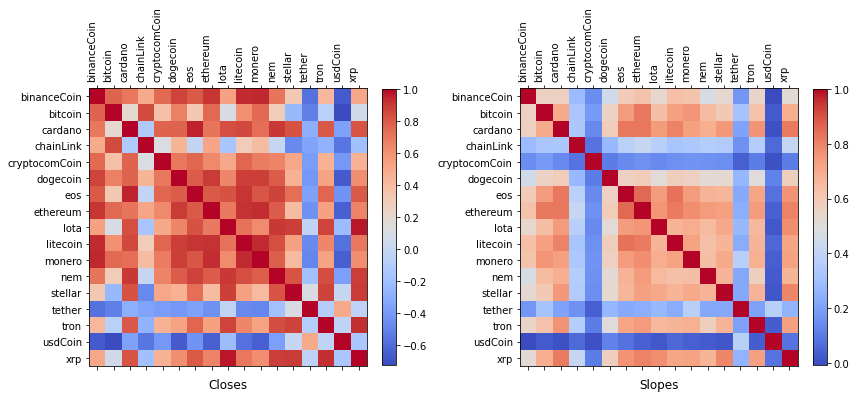

In [26]:
corr_heatmaps(closes, "Closes", slopes, "Slopes")

Como podemos perceber, as comparações são basicamente equivalentes, visto que os heatmaps de Close e Slope são 
virtualmente idênticos. Por isso, a partir de agora usaremos apenas uma das correlações, a de Slope,
para progredir nossa análise.

#### Previsão do comportamento e valor de uma moeda baseada nas demais

In [27]:
columns = list(closes.columns)
data = []
for coin in columns:
    cols = columns.copy()
    cols.remove(coin)
    df = closes[cols].copy()
    y = closes[coin]
    df["const"] = 1
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /= 5
    
    est = sm.OLS(closes[coin], df)
    est = est.fit()
    data += [(coin, est.rsquared, est.mse_total, err, y.mean())]

In [28]:
closes_df = pd.DataFrame(data, columns=["coin", "R²", "MSE", "CV MSE", "Mean(y)"])
closes_df.set_index("coin")

,R²,MSE,CV MSE,Mean(y)
coin,,,,
binanceCoin,0.969274,6.927977e+01,1.287230e+01,20.092979
bitcoin,0.979702,6.962395e+06,5.957193e+05,7395.246281
cardano,0.972919,3.421702e-04,9.141280e-05,0.055499
chainLink,0.938322,8.836554e-01,4.128434e-01,1.536396
cryptocomCoin,0.808844,4.622954e-04,8.269393e-04,0.044579
dogecoin,0.914836,1.989740e-07,8.866599e-08,0.002563
eos,0.970325,1.974309e+00,2.790314e-01,4.020991
ethereum,0.983129,2.538413e+03,1.887110e+02,181.770138
lota,0.968561,4.921056e-03,6.484878e-04,0.297822


Um resultado muito positivo, exceto para o caso da usdCoin, que tem um comportamento anômalo. Nota-se que o MSE tem uma escala proxima da média de y.

Porem, pode ser mais interessante/lucrativo prever a variação de uma moeda dadas as outras moedas. Isso é testado a seguir

In [29]:
columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = slopes[cols].copy()
    df["const"] = 1
    y = slopes[col]
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /= 5
    
    
    est = sm.OLS(slopes[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]

In [30]:
slopes_df = pd.DataFrame(data, columns=["coin", "R²", "CV MSE"])
slopes_df.set_index("coin")

,R²,CV MSE
coin,,
binanceCoin,0.486190,0.001103
bitcoin,0.732716,0.000487
cardano,0.817326,0.000484
chainLink,0.212575,0.004373
cryptocomCoin,0.050625,0.010550
dogecoin,0.434823,0.000845
eos,0.820140,0.000564
ethereum,0.863585,0.000344
lota,0.688867,0.000626


O resultado não é tão positivo quanto o anterior, mas algumas moedas ainda apresentam R² relativamente alto e MSE baixo.

Porém, pode fazer mais sentido tentar prever se a moeda vai ter crescimento ou decrescimento de valor naquele dia, independente do valor do crescimento. Isso é explorado a seguir.

In [31]:
columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = slopes[cols].copy()
    df = (df - df.mean(0))/df.std(0)
    df["const"] = 1
    y = slopes[col].values
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
    err /= 5
    
    est = sm.OLS(slopes[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]
pd.DataFrame(data, columns=["coin", "R²", "CV ROCAUC"])

,coin,R²,CV ROCAUC
0,binanceCoin,0.486190,0.712349
1,bitcoin,0.732716,0.786934
2,cardano,0.817326,0.848187
3,chainLink,0.212575,0.654732
4,cryptocomCoin,0.050625,0.524143
5,dogecoin,0.434823,0.743797
6,eos,0.820140,0.827969
7,ethereum,0.863585,0.870115
8,lota,0.688867,0.784085
9,litecoin,0.775508,0.824317


Para algumas moedas, como a stellar, temos um preditor razoável de variação dada umas variação. Porém, talvez seja mais relevante prever o valor com antecedência, usando por exemplo os valores das moedas no dia anterior.

In [32]:
columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    df = slopes[cols].copy()
    df["const"] = 1
    df = df.iloc[:-1]
    y = slopes[col].values[1:]
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    baseline_err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
        
        baseline_pred = (df[col].values[test_idx]> 0).astype(int)
        baseline_err += roc_auc_score(y[test_idx], baseline_pred)
    err /= 5
    baseline_err /= 5
    y = slopes[col].iloc[1:]
    y.index = df.index
    est = sm.OLS(y, df)
    est = est.fit()
    data += [(col, est.rsquared, err, baseline_err)]
pd.DataFrame(data, columns=["coin", "OLS R²", "LR CV ROCAUC", "Baseline"])

,coin,OLS R²,LR CV ROCAUC,Baseline
0,binanceCoin,0.048129,0.524209,0.458427
1,bitcoin,0.097392,0.506748,0.456986
2,cardano,0.089006,0.558644,0.446290
3,chainLink,0.087816,0.564960,0.446073
4,cryptocomCoin,0.035695,0.491304,0.458181
5,dogecoin,0.096015,0.504096,0.464760
6,eos,0.062837,0.579958,0.399518
7,ethereum,0.102819,0.514914,0.428016
8,lota,0.092825,0.525477,0.427774
9,litecoin,0.090153,0.503366,0.461747


Lamentavelmente uma regressão logistica utilizando $X_{t-1}$ tem resultado pouco melhor que o acaso para a maioria das CMs. Porém é melhor que o baseline de repetir o sinal do ultimo valor.

In [33]:
from statsmodels.tsa.ar_model import AutoReg

def split(df):
    size = len(df)
    return df.iloc[:round(size*0.9)], df.iloc[round(size*0.9):]

data = []
for coin in coinsDict.keys():
    df = coinsDict[coin].copy()
    df["LogDiff"] = np.log1p(df["Close"]) - np.log1p(df["Open"])
    
    train, test = split(df[["LogDiff"]])
    model = AutoReg(train, lags=10)
    res = model.fit()
    coef = res.params
    window = 10
    predictions = []
    idx = test.index[0]
    for i in range(len(test)):
        y_hat = coef[0]
        for d in range(window):
            y_hat += coef[d+1] * df["LogDiff"].iloc[i+idx-d-1]
        predictions.append(y_hat)
    predictions = np.array(predictions)
#     plt.figure()
#     plt.title(f"{coin} LogDifferences")
#     plt.plot(df["LogDiff"])
#     plt.plot(res.fittedvalues)
#     plt.plot(res.forecast(steps=len(test)))
#     plt.show()
    correct = (predictions > 0) == (test.values[:, 0] > 0)
    acc = correct.mean()
    first_correct = correct[0]
    data += [(coin, acc, first_correct)]

pd.DataFrame(data, columns=["CM", "ACC", "Immediate Pred"])


/home/castro/miniconda3/envs/vn/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


,CM,ACC,Immediate Pred
0,aave,0.466667,False
1,binanceCoin,0.549618,False
2,bitcoin,0.576923,True
3,cardano,0.392000,False
4,chainLink,0.523810,False
5,cosmos,0.513889,False
6,cryptocomCoin,0.456790,False
7,dogecoin,0.441065,False
8,eos,0.462687,False
9,ethereum,0.571429,False


Vemos aqui que para alguma moedas, uma simples autorregressão pode prever com 60% de acerto as subidas e descidas de algumas CMs.

## Datas de Variação entre moedas

Vamos agora analizar se os dias de alta variação para uma moeda dizem alguma coisa para as outras moedas

Utilizaremos um bootstrap para medir a diferença de médias para os dias de maior variação da moeda 1 para a moeda 2 em relação a dias escolhidos aleatoriamente.

<AxesSubplot:>

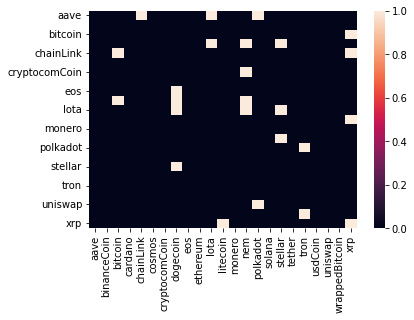

In [49]:
data = np.zeros([len(coinsDict)]*2)
from scipy import stats
for i, (key1, df) in enumerate(coinsDict.items()):
    for j, (key2, df2) in enumerate(coinsDict.items()):
        df1 = df.copy()
        
        start = max([min(df1["Date"]), min(df2["Date"])])
        end = min([max(df1["Date"]), max(df2["Date"])])
        df1 = df1[(df1["Date"] >= start) & (df1["Date"] <= end)]
        df2 = df2[(df2["Date"] >= start) & (df2["Date"] <= end)]
        df1.index = range(len(df1))
        df2.index = range(len(df2))
        df1["AbsDiff"] = np.abs(df1["DifferencePerc"])
        top100 = df1.nlargest(100, "AbsDiff")
        selector = np.zeros(len(df1))
        selector[top100.index] = 1
        high_mean = df2.iloc[selector]["DifferencePerc"].mean()
        means = []
        for k in range(1000):
            B = np.random.choice(df2.index,100,replace=True)
            mean = df2["DifferencePerc"].values[B].mean()
            means.append(mean)
        means = np.array(diffs)
        l,u = means.mean() - 1.96*means.std(), means.mean()+ 1.96*means.std()
        data[i,j] = l <= high_mean and high_mean <= u
h0 = pd.DataFrame(data, columns=coinsDict.keys(), index=coinsDict.keys())
sb.heatmap(h0)

Os pares representados por pixels brancos indicam que a hipótese nula, de que não há anormalidade na média das datas selecionadas, é verdadeira, enquanto os pixels pretos representam pares onde essa hipotese nula pode ser discartada

<AxesSubplot:>

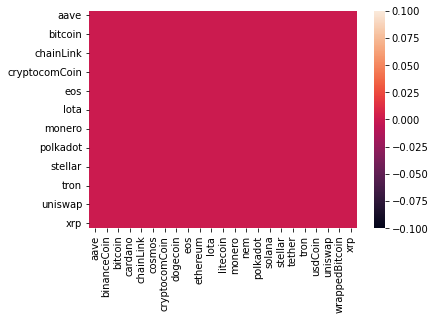

In [53]:
data = np.zeros([len(coinsDict)]*2)
from scipy import stats
for i, (key1, df) in enumerate(coinsDict.items()):
    for j, (key2, df2) in enumerate(coinsDict.items()):
        df1 = df.copy()
        
        start = max([min(df1["Date"]), min(df2["Date"])])
        end = min([max(df1["Date"]), max(df2["Date"])])
        df1 = df1[(df1["Date"] >= start) & (df1["Date"] <= end)]
        df2 = df2[(df2["Date"] >= start) & (df2["Date"] <= end)]
        df1.index = range(len(df1))
        df2.index = range(len(df2))
        df1["AbsDiff"] = np.abs(df1["DifferencePerc"])
        top100 = df1.nlargest(100, "AbsDiff")
        selector = np.zeros(len(df1))
        selector[top100.index] = 1
        high_std = df2.iloc[selector]["DifferencePerc"].std()
        stds = []
        for k in range(1000):
            B = np.random.choice(df2.index,100,replace=True)
            std = df2["DifferencePerc"].values[B].std()
            stds.append(std)
        stds = np.array(diffs)
        l,u = stds.mean() - 1.96*stds.std(), stds.mean()+ 1.96*stds.std()
        data[i,j] = l <= high_std and high_std <= u
pvalues = pd.DataFrame(data, columns=coinsDict.keys(), index=coinsDict.keys())
sb.heatmap(pvalues)

Para todos os casos, podemos rejeitar a hipótese nula. Ou seja, nos dias de alta variação para uma moeda, há variancia átipica.


A seguir realizamos um teste menos estatístico utilizando o coeficiente de Jaccard de dos conjuntos de datas de alta variação para duas moedas

<ipython-input-60-31a2b88cd12b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["AbsDiff"] = np.abs(df2["DifferencePerc"])


<AxesSubplot:>

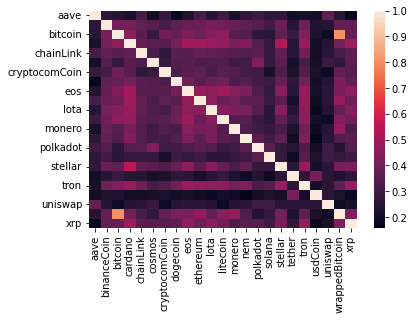

In [60]:
data = np.zeros([len(coinsDict)]*2)
from scipy import stats
for i, (key1, df) in enumerate(coinsDict.items()):
    for j, (key2, df2) in enumerate(coinsDict.items()):
        df1 = df.copy()
        
        start = max([min(df1["Date"]), min(df2["Date"])])
        end = min([max(df1["Date"]), max(df2["Date"])])
        df1 = df1[(df1["Date"] >= start) & (df1["Date"] <= end)]
        df2 = df2[(df2["Date"] >= start) & (df2["Date"] <= end)]
        df1.index = range(len(df1))
        df2.index = range(len(df2))
        df1["AbsDiff"] = np.abs(df1["DifferencePerc"])
        df2["AbsDiff"] = np.abs(df2["DifferencePerc"])
        top10_1 = df1.nlargest(len(df1)//3, "AbsDiff")
        top10_2 = df2.nlargest(len(df1)//3, "AbsDiff")
        top1 = set(top10_1["Date"])
        top2 = set(top10_2["Date"])
        data[i,j] = len(top1.intersection(top2))/len(top1.union(top2))
pvalues = pd.DataFrame(data, columns=coinsDict.keys(), index=coinsDict.keys())
sb.heatmap(pvalues)

Temos alguns pontos de alta similaridade, como por exemplo (stellar, cardanno) e (bitcoin, wrappedbitcoin), mas no geral as similaridades se apresentam baixas.

## Breve análise exploratória
Em seguida, vamos analizar as distribuições de cada CM.

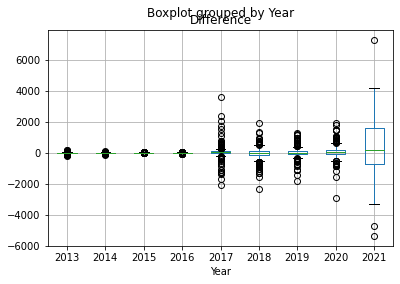

In [68]:
btc = coinsDict['bitcoin']
def plot_seasonal_differences(df, period, value):
    df.boxplot(by=period, column=value)
    plt.show()
plot_seasonal_differences(btc, "Year", "Difference")

In [36]:
subdf = coinsDict['bitcoin'][['Difference', 'Year', 'Month']].groupby(['Year', 'Month']).sum()

In [37]:
subdf
# plt.hist(subdf['Difference'])

Difference
Year Month              
2013 04         5.095993
     05        -9.280022
     06       -32.839806
     07         6.224312
     08        26.770012
...                  ...
2020 10      2965.791415
     11      5869.076567
     12      9380.478105
2021 01      3369.342107
     02     13147.526109

[95 rows x 1 columns]

In [38]:
import copy
#dados Z-normalizados por dia
Zcoindict = copy.deepcopy(coinsDict)

for coin in Zcoindict:
    Zcoindict[coin]['High'] = (Zcoindict[coin]['High'] - Zcoindict[coin]['High'].mean())/Zcoindict[coin]['High'].std()
    Zcoindict[coin]['Low'] = (Zcoindict[coin]['Low'] - Zcoindict[coin]['Low'].mean())/Zcoindict[coin]['Low'].std()
    Zcoindict[coin]['Open'] = (Zcoindict[coin]['Open'] - Zcoindict[coin]['Open'].mean())/Zcoindict[coin]['Open'].std()
    Zcoindict[coin]['Close'] = (Zcoindict[coin]['Close'] - Zcoindict[coin]['Close'].mean())/ Zcoindict[coin]['Close'].std()
    # Zcoindict[coin]['Variation'] = (Zcoindict[coin]['Variation'] - Zcoindict[coin]['Variation'].mean())/Zcoindict[coin]['Variation'].std()

Zcoindict['bitcoin'].tail()



,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DifferencePerc
2857,2858,Bitcoin,BTC,2021-02-23,6.848241,6.088838,7.120228,6.304182,1.061025e+11,9.099259e+11,2021,02,23,-5380.502887,-0.099262
2858,2859,Bitcoin,BTC,2021-02-24,6.442780,6.377251,6.345758,6.430475,6.369552e+10,9.263931e+11,2021,02,24,870.245655,0.017820
2859,2860,Bitcoin,BTC,2021-02-25,6.534427,6.359306,6.471811,6.056074,5.450657e+10,8.777661e+11,2021,02,25,-2615.229406,-0.052611
2860,2861,Bitcoin,BTC,2021-02-26,6.036685,5.963486,6.107119,5.947962,3.509679e+11,8.637523e+11,2021,02,26,-840.703971,-0.017819
2861,2862,Bitcoin,BTC,2021-02-27,6.020338,6.085604,5.986591,5.926270,4.591095e+10,8.609781e+11,2021,02,27,-156.320962,-0.003373


In [39]:
#A data de criação da moeda diz algo a respeito do seu Marketcap atual ?

from datetime import datetime

df_allCoins = pd.DataFrame()

for coins in coinsDict:
  df_aux = convert(coinsDict[coins].iloc[[0, -1]], 'dataframe')
  df_allCoins = pd.concat([df_allCoins, df_aux], ignore_index=True)

df_coin_per_existence_time = pd.DataFrame(columns=['Name', 'Existence_time (days)', 'Last_Marketcap'])

for coinName in np.unique(df_allCoins["Name"]):
  init_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[0]
  init_time = datetime.fromisoformat(init_time)

  end_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[1]
  end_time = datetime.fromisoformat(end_time)

  existence_time = (pd.Timedelta(end_time - init_time).days)

  last_mktcap = df_allCoins[df_allCoins["Name"] == coinName]["Marketcap"].iloc[1]

  series_aux = pd.Series([coinName, existence_time, last_mktcap], index=df_coin_per_existence_time.columns)
  df_coin_per_existence_time = pd.concat([df_coin_per_existence_time, convert(series_aux, 'dataframe')], ignore_index=True)

df_coin_per_existence_time = df_coin_per_existence_time.sort_values(by=['Existence_time (days)', 'Last_Marketcap']).reset_index()
df_coin_per_existence_time


NameError: name 'convert' is not defined

In [ ]:
df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).corr()

In [ ]:
x, y = df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).values.T
x = sm.add_constant(x)
res = sm.OLS(y, x).fit()
res.summary()

# REVER

In [ ]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
        elif isinstance(data, pd.Series):
            converted = data.to_frame().T
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted


$X_i = X_{i-1} + \delta_i$; $\delta_i = \delta_{i-1} + \Delta_i$

In [ ]:
coinsDict['bitcoin']['Difference'].var()

In [ ]:
#variancia da variação

coinsDict['bitcoin']['Difference'].std()

In [ ]:
coinsDict['bitcoin'].head()